In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
course_with_exam_limit = pd.read_csv("/kaggle/input/course-with-final-exam/course_with_final_exam_limit.csv")
course_with_exam_limit

,Unnamed: 0,id,name,field,prerequisites,about,resource
0,51,C_676642,创办新企业,['工商管理'],NaN,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节..."
1,65,C_676664,大国航母与舰载机,[],NaN,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '..."
2,270,C_680992,网络综合布线,"['计算机科学与技术', '信息与通信工程']",计算机网络技术、电工电子技术、计算机导论,网络综合布线课程旨在提高学生综合布线施工技术，加深对综合布线规范的理解，掌握综合布线工程的设...,"[{'titles': ['网络综合布线课程介绍', '网络综合布线课程宣传片', ' 网络..."
3,283,C_681027,民族手工艺术——走进生活,['民族学'],NaN,想制作编织小物表达小小心情，想给他送去冬日的温暖，想给自己的家营造浪漫的氛围，让我们自己来亲...,"[{'titles': ['第 一 章 民族手工艺术的历史及内涵', '第一节 民族手工艺..."
4,329,C_681114,"Hello,心理学",[],无,精选核心知识点，从历史、方法、研究主题、应用四个方面对普通心理学的主体内容进行介绍。课程内容...,"[{'titles': ['第一单元 导论', '第一节 关于心理学的6个误解（一）', '..."
...,...,...,...,...,...,...,...
95,3194,C_1925909,Chinese Literature,[],Learners have a strong interest in Chinese and...,In this course，we set up nine theme-based unit...,"[{'titles': ['德行天下/Morality', '单元导学/Unit Guida..."
96,3257,C_2033958,工程伦理2.0,[],NaN,工程伦理教育培养德才兼备的工程科技人才,"[{'titles': ['第一章 工程与伦理', None, '工程伦理概述'], 're..."
97,3273,C_2059293,生活中的化工原理（下）,[],《物理化学》,欢迎来到《生活中的化工原理》。化工原理是化工类及相关专业的一门专业基础课和技术...,"[{'titles': ['第1章 蒸馏', '1.1 蒸馏原理及分类', '1.1 蒸馏的..."
98,3277,C_2059299,视觉传达与传播设计,[],NaN,安徽工程大学艺术学院的视觉传达课程是从艺术设计、动画、工业设计的课程体系发展整合而成，使用该...,"[{'titles': ['第二章 视觉传达的基本理论', '2.1 视觉传达发展概述',..."


In [3]:
course_with_exam_2 = pd.read_csv("/kaggle/input/course-with-exam/final_course_exam.csv")
course_with_exam_2

,Unnamed: 0,id,exam_resources
0,0,C_1073350,"['Ex_1650729', 'Ex_1650730']"
1,1,C_1714443,['Ex_3625291']
2,2,C_1718815,['Ex_4974697']
3,3,C_1721804,"['Ex_3742687', 'Ex_3742688']"
4,4,C_1724283,['Ex_3800298']
...,...,...,...
373,373,C_948114,"['Ex_1467099', 'Ex_1573116', 'Ex_1573117']"
374,374,C_948123,['Ex_1467720']
375,375,C_948128,"['Ex_6318041', 'Ex_6318076']"
376,376,C_948140,['Ex_1469502']


In [4]:
course_info = pd.read_csv("/kaggle/input/course-info-limit/course_info_limit.csv")
course_info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183,1.0,50.0,10.0,40.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']"
1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573,1.0,60.0,40.0,0.0,1.0,"['2019-11-04', '2020-02-11', '2020-08-20', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']"
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']"
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']"
4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-13', '2020-08-05', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']"
1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']"
1089,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立、提升、维护客户...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488,0.0,55.0,15.0,30.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']"
1090,C_2343056,运动训练基本原理与方法,[],0,"['先修运动训练学', '运动解剖学', '运动生理学', '运动医学等基础课程。\t']",4,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",154,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['fall', 'spring']"


In [5]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          1092 non-null   object 
 1   name               1091 non-null   object 
 2   field_x            1092 non-null   object 
 3   num_field_x        1092 non-null   int64  
 4   prerequisites      1092 non-null   object 
 5   num_prerequisites  1092 non-null   int64  
 6   about              1090 non-null   object 
 7   resource           1092 non-null   object 
 8   count_course_id    1092 non-null   int64  
 9   certificate        1004 non-null   float64
 10  assignment         990 non-null    float64
 11  video              990 non-null    float64
 12  exam               989 non-null    float64
 13  type               999 non-null    float64
 14  start_date         983 non-null    object 
 15  end_date           976 non-null    object 
 16  season             975 n

In [6]:
course_info.describe()

,num_field_x,num_prerequisites,count_course_id,certificate,assignment,video,exam,type
count,1092.000000,1092.000000,1.092000e+03,1004.000000,990.000000,990.000000,989.000000,999.000000
mean,0.102564,0.693223,1.354571e+04,0.602590,48.315152,32.087879,19.524772,0.913914
std,0.358877,1.265139,1.141606e+05,0.489606,18.081483,15.307015,18.217830,0.280632
min,0.000000,0.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.127500e+02,0.000000,35.000000,20.000000,0.000000,1.000000
50%,0.000000,0.000000,4.955000e+02,1.000000,50.000000,30.000000,20.000000,1.000000
75%,0.000000,1.000000,3.462750e+03,1.000000,60.000000,40.000000,30.000000,1.000000
max,2.000000,22.000000,3.315796e+06,1.000000,100.000000,100.000000,100.000000,1.000000


In [7]:
course_info_no_zeros = course_info.replace(0, np.nan)
course_info_no_zeros.describe()

,num_field_x,num_prerequisites,count_course_id,certificate,assignment,video,exam,type
count,92.000000,494.000000,1.092000e+03,605.0,978.000000,956.000000,611.000000,913.0
mean,1.217391,1.532389,1.354571e+04,1.0,48.907975,33.229079,31.603928,1.0
std,0.414731,1.501170,1.141606e+05,0.0,17.376195,14.306841,12.457018,0.0
min,1.000000,1.000000,1.100000e+01,1.0,1.000000,3.000000,5.000000,1.0
25%,1.000000,1.000000,1.127500e+02,1.0,35.000000,20.000000,27.000000,1.0
50%,1.000000,1.000000,4.955000e+02,1.0,50.000000,30.000000,30.000000,1.0
75%,1.000000,1.000000,3.462750e+03,1.0,60.000000,40.000000,40.000000,1.0
max,2.000000,22.000000,3.315796e+06,1.0,100.000000,100.000000,100.000000,1.0


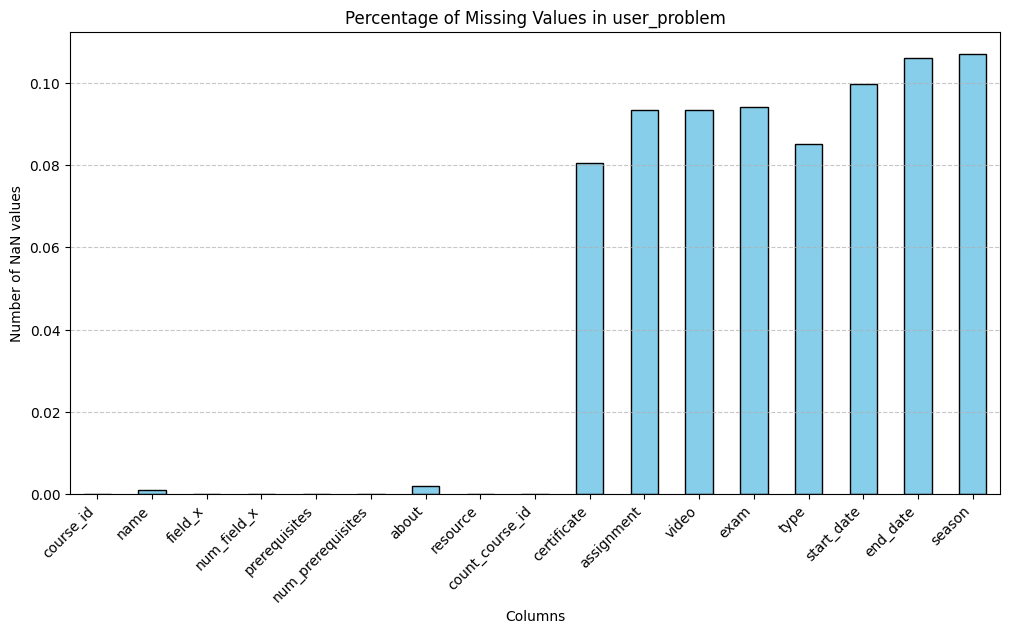

In [8]:
# Count NaN values per column
nan_counts = course_info.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [9]:
course_info = course_info[course_info['type'] == 1]
course_info.shape

(913, 17)

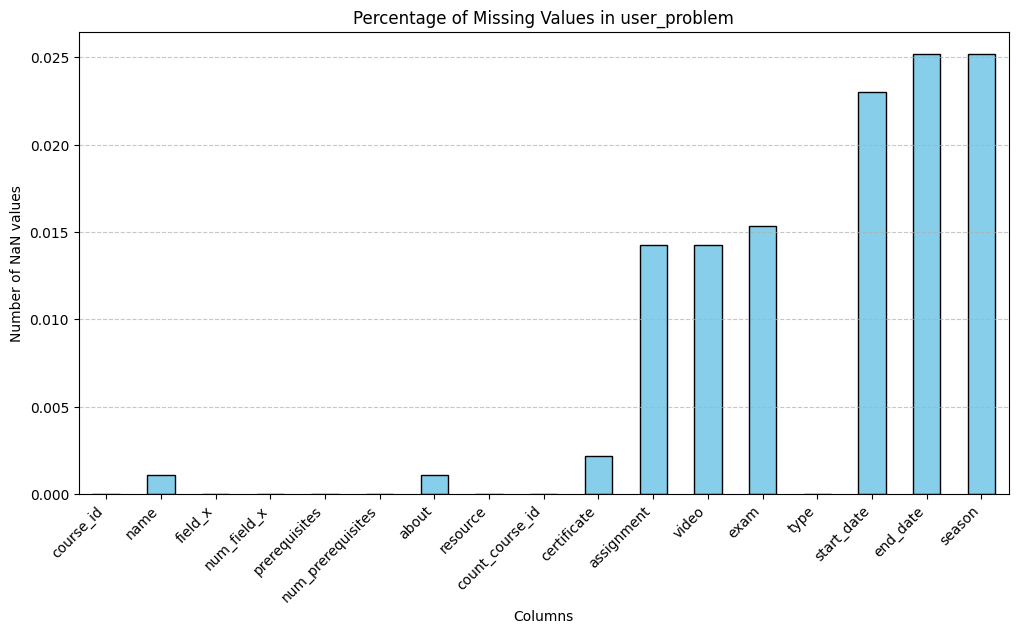

In [10]:
# Count NaN values per column
nan_counts = course_info .isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [11]:
course_info[course_info['assignment'].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season
590,C_1774987,Academic English for Science and Engineering,[],0,['Intermediate English level is required to le...,1,Academic English for Science and Engineering i...,"[{'titles': ['Module 1 Course Introduction', '...",3871,NaN,NaN,NaN,NaN,1.0,['2020-04-27'],['2021-08-31'],['spring']
683,C_1829954,当代中国发展与改革,[],0,[],0,国家治理认证证书项目拟定由《习近平新时代中国特色社会主义思想》、《公共危机管理》、《当代中国...,"[{'titles': ['第一讲 中国长期发展的大历史轨迹', None, '1-1 中国...",150,1.0,NaN,NaN,NaN,1.0,"['2020-06-08', '2020-09-01', '2021-01-04']","['2020-08-31', '2020-12-31', '2021-07-25']","['summer', 'fall', 'winter']"
918,C_2211915,（校内）学做小程序--云开发篇：近义词小程序,[],0,['基础计算机编程知识'],1,微信小程序 云开发 实操 手把手\n 本课程是由清华大学软件学院和乐享其约共...,"[{'titles': ['第一章：课程导论', None, '1.1预期成果'], 're...",26,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
920,C_1628052,推荐系统训练营,[],0,[],0,《推荐系统》训练营是由清华大学张敏老师主讲，内容涵盖“个性化推荐基础”、“个性化推荐的挑战性...,"[{'titles': ['第1章：个性化推荐基础', '课程简介', '1.1_课程简介与...",911,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
959,C_949439,Python程序设计（北邮认证）,[],0,[],0,本项目面向国家社会经济发展需求，面向人工智能领域创新创业就业的人才需求，结合北京邮电大学的信...,"[{'titles': ['第一章 Python编程基础', '第一节 导论', '1.1 ...",372,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
992,C_830572,知识产权法律及实务（清华认证),[],0,[],0,"本课程由清华大学深圳研究生院数据科学领域专业教师授课,为学习者提供大数据获取、存储、计算、管...","[{'titles': ['第一讲 打开知识产权之窗：知识产权的概念与特征', '开场白',...",683,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
993,C_830571,大数据机器学习（清华认证),[],0,[],0,"本课程由清华大学深圳研究生院数据科学领域专业教师授课,为学习者提供大数据获取、存储、计算、管...","[{'titles': ['第一章 概述', '1.机器学习定义和典型应用', '1.机器学...",1102,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
994,C_830569,高级大数据系统（清华认证）,[],0,[],0,"本课程由清华大学深圳研究生院数据科学领域专业教师授课,为学习者提供大数据获取、存储、计算、管...",[{'titles': ['Introduction to Big Data Systems...,1419,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
995,C_830568,数据挖掘：理论与算法（清华认证）,[],0,[],0,"本课程由清华大学深圳研究生院数据科学领域专业教师授课,为学习者提供大数据获取、存储、计算、管...","[{'titles': ['第一章 走进数据科学：博大精深，美不胜收', '第一节 整装待发...",3013,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
996,C_830439,数据科学导论（清华认证）,[],0,[],0,"本课程由清华大学深圳研究生院数据科学领域专业教师授课,为学习者提供大数据获取、存储、计算、管...","[{'titles': ['第一章 数据科学 你的影子无所不在', '第一节 开宗明义', ...",1107,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


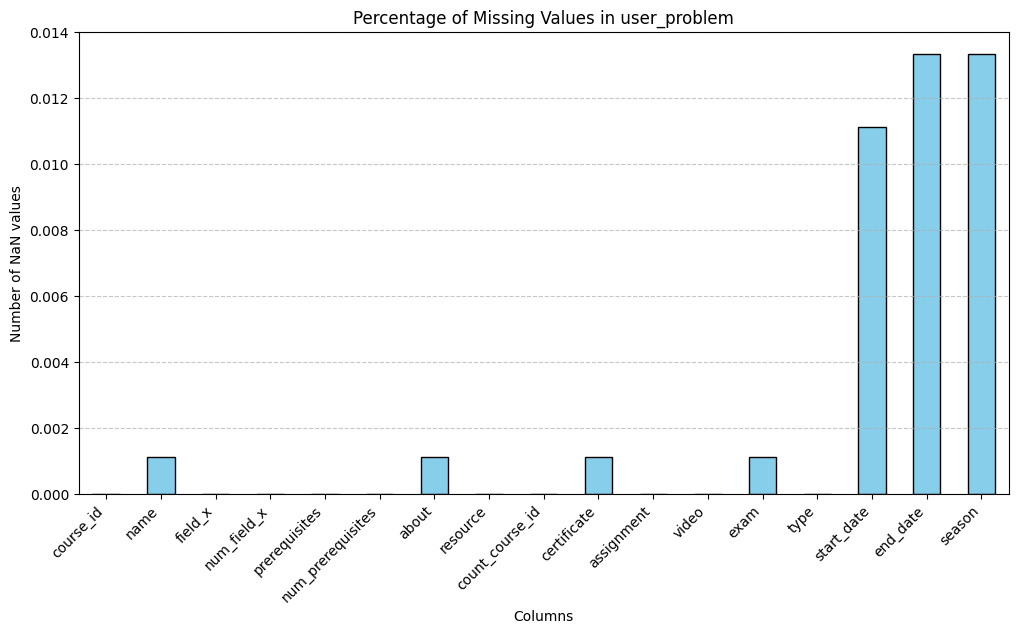

In [12]:
course_info = course_info[course_info['assignment'].notna()]
# Count NaN values per column
nan_counts = course_info .isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [13]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 1090
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          900 non-null    object 
 1   name               899 non-null    object 
 2   field_x            900 non-null    object 
 3   num_field_x        900 non-null    int64  
 4   prerequisites      900 non-null    object 
 5   num_prerequisites  900 non-null    int64  
 6   about              899 non-null    object 
 7   resource           900 non-null    object 
 8   count_course_id    900 non-null    int64  
 9   certificate        899 non-null    float64
 10  assignment         900 non-null    float64
 11  video              900 non-null    float64
 12  exam               899 non-null    float64
 13  type               900 non-null    float64
 14  start_date         890 non-null    object 
 15  end_date           888 non-null    object 
 16  season             888 non-nul

In [14]:
course_info[(course_info['certificate'].isna()) | (course_info['exam'].isna())]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season
298,C_697126,药物化学,['药学'],1,[],0,《药物化学》是校级精品课程，也是药学专业的专业核心课程，其主要针对药学及其相关专业的本科生。...,"[{'titles': ['绪论', '药物作用的生物学基础', '药物作用的生物学基础']...",474,NaN,30.0,30.0,40.0,1.0,"['2020-02-17', '2021-03-12']","['2020-07-31', '2021-07-31']","['spring', 'spring']"
1005,C_2297230,组织胚胎学,[],0,[],0,该课程以哺乳动物为主线，有机结合鱼类、虾蟹、贝类、棘皮动物等水产经济动物，介绍四大基本组织及...,"[{'titles': ['第一章 上皮组织', None, '被覆上皮的分类及结构功能特...",55,0.0,40.0,20.0,NaN,1.0,"['2020-10-30', '2021-03-01']","['2021-02-28', '2021-07-25']","['fall', 'spring']"


In [15]:
course_info['exam'].fillna(0, inplace=True)
course_info['certificate'].unique()

<ipython-input-15-5b4404a3538c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  course_info['exam'].fillna(0, inplace=True)


array([ 1.,  0., nan])

In [16]:
course_info['exam'].fillna(1, inplace=True)
course_info['certificate'].unique()

<ipython-input-16-11dfcae9dee0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  course_info['exam'].fillna(1, inplace=True)


array([ 1.,  0., nan])

In [17]:
# Find rows where 'exam' is NaN
mask = course_info['exam'].isna()

# Replace values in those rows
course_info.loc[mask, 'exam'] = 1
course_info.loc[mask, 'assignment'] = 80

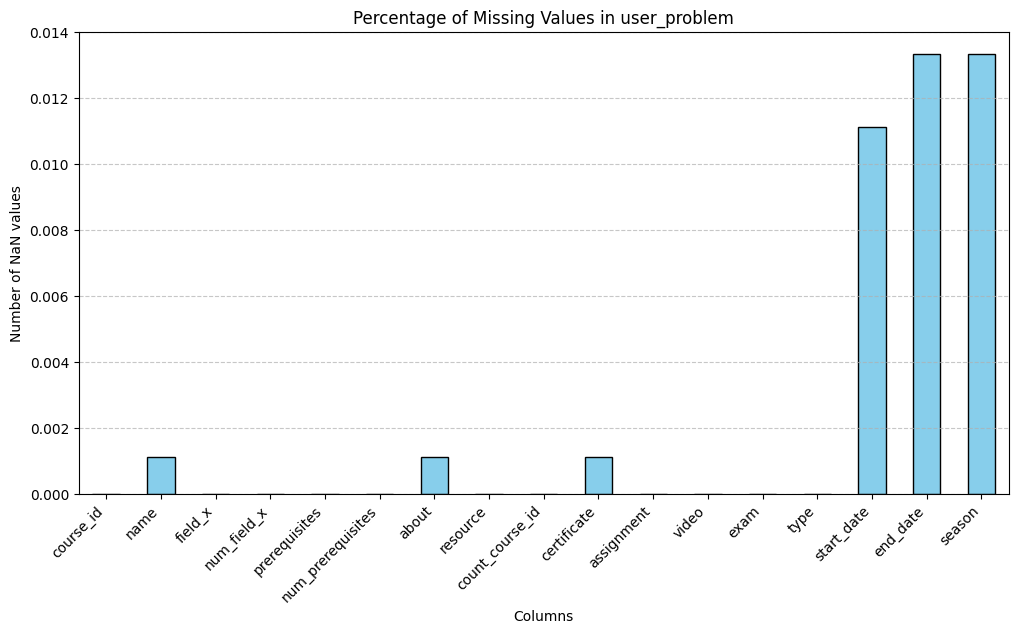

In [18]:
# Count NaN values per column
nan_counts = course_info .isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [19]:
course_info[(course_info['start_date'].isna()) | (course_info['end_date'].isna())]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season
12,C_677129,媒体大数据挖掘与案例实战,[],0,[],0,什么是大数据（Big Data）？它将如何改变我们的社会生活？《媒体大数据挖掘与案例实战》课...,"[{'titles': ['第一讲：绪论', '1.1 大数据的概念及发展趋势', '绪论...",27,1.0,70.0,30.0,0.0,1.0,NaN,NaN,NaN
75,C_682289,线性代数,[],0,[],0,线性代数是19世纪后期发展起来的一个数学分支，它在当代高等院校的教学计划中是一门基础理论课。...,"[{'titles': ['线性代数导论', '线性代数导论', '线性代数导论'], 'r...",13,1.0,40.0,60.0,0.0,1.0,NaN,NaN,NaN
86,C_682480,生理学,[],0,['需要学习了人体解剖与组织胚胎学，生物化学与分子细胞生物学，在此基础上学习效果更好。'],1,生理学是生物科学的一个分支，是研究生物体及其各组成部分正常功能活动及其规律的一门学科。本课程...,"[{'titles': ['第一章 绪论', '生理学的任务和研究方法，机体内环境稳态及生...",23,1.0,30.0,40.0,30.0,1.0,NaN,NaN,NaN
234,C_770751,Linux导论,['计算机科学与技术'],1,[],0,从来没学过Linux？想重新捡起学过的知识？免费学习这门课程，获取相关资格证书。,"[{'titles': ['来自Linux之父的问候 Welcome!', '来自Linux...",1904,1.0,30.0,20.0,50.0,1.0,NaN,NaN,NaN
291,C_680895,儿童口腔医学,[],0,[],0,《儿童口腔医学》课程主要内容包括，常见的牙齿发育异常，乳牙和年轻恒牙的龋病与牙髓病、乳牙和年...,"[{'titles': ['第一章 儿童行为管理', '1.1 儿童行为管理', '儿童行...",313,1.0,40.0,20.0,40.0,1.0,NaN,NaN,NaN
304,C_735195,循证护理与知识转化,[],0,[],0,《循证护理与知识转化》免费网络公开课内容包括循证护理的概述、循证护理问题的提出、证据检索与分...,"[{'titles': ['第一章 概述与循证问题', '1.1 循证护理基本概念与意义'...",993,1.0,60.0,40.0,0.0,1.0,NaN,NaN,NaN
331,C_947794,高级机器学习训练营,[],0,[],0,“高级机器学习训练营”是学堂在线联合清华大学计算机系副主任、杰青获得者唐杰教授共同研发的人工...,"[{'titles': ['一、课程简介和预习准备', '1.1\t课程概述', '高级机器...",18,1.0,70.0,30.0,0.0,1.0,NaN,NaN,NaN
410,C_1527407,知识产权法学,[],0,[],0,课程内容紧紧围绕我国现行的法律制度，介绍知识产权法学的基本理论知识，让你听过学过就能在实践中...,"[{'titles': ['第一章 知识产权法概述', '1.1+1. 2 知识产权的概念、...",95,1.0,40.0,20.0,40.0,1.0,NaN,NaN,NaN
668,C_1557390,机器学习,[],0,[],0,本课程介绍经典的机器学习核心理论、算法及其应用，包括决策树、线性模型、神经网络模型、聚类模型...,"[{'titles': ['引言', None, '什么是“机器学习”'], 'resour...",99,1.0,40.0,30.0,30.0,1.0,NaN,NaN,NaN
731,C_1903983,学前教育学,[],0,[],0,本课程主要讲授对0-6岁学前儿童教育的基本规律与教育原则。通过本课程的学习，学习者可获得学前...,"[{'titles': ['第一章 学前教育概述', None, '01-01学前教育的概...",9307,1.0,40.0,30.0,30.0,1.0,NaN,NaN,NaN


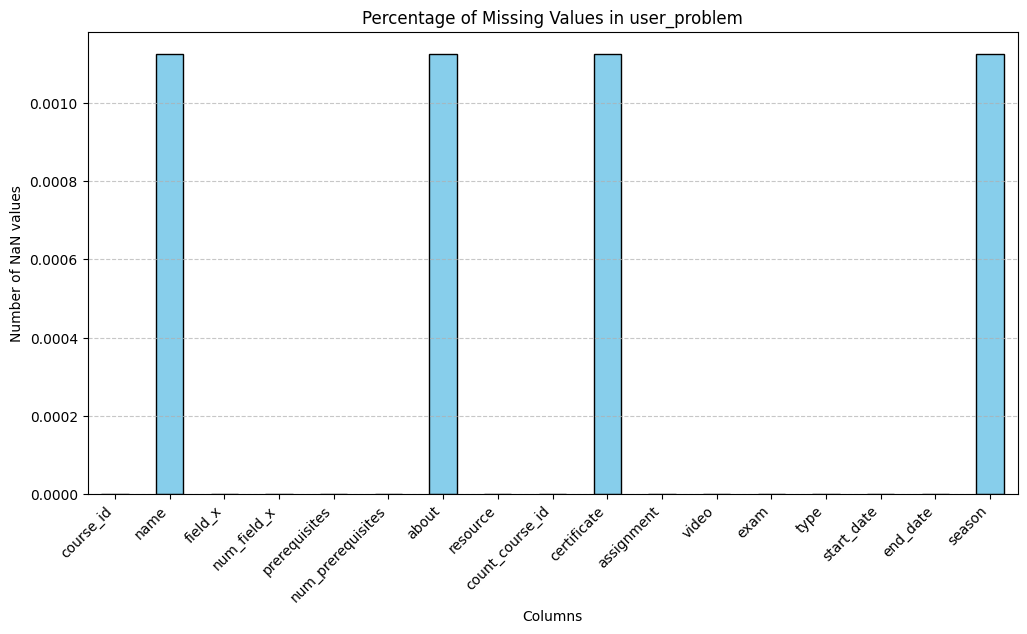

In [20]:
course_info = course_info.dropna(subset=['start_date', 'end_date'])
nan_counts = course_info .isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [21]:
course_info[(course_info['season'].isna())]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season
955,C_2244921,概率论,[],0,['高等数学，大学数学I'],1,用科学的方法解释随机现象，用有趣的案例探索真实的可能性，模型与运算结合、展示概率魅力、开启概...,"[{'titles': ['第一章 随机事件及其概率', '第一节 基本概念', '1.1....",157,0.0,80.0,0.0,20.0,1.0,"['2020-06-24', '2020-09-01', '2021-01-04']","['2020-08-31', '2020-12-31', '2021-07-25']",NaN


In [22]:
course_with_exam_limit.rename(columns={'id': 'course_id'}, inplace=True)

In [23]:
course_with_exam_limit

,Unnamed: 0,course_id,name,field,prerequisites,about,resource
0,51,C_676642,创办新企业,['工商管理'],NaN,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节..."
1,65,C_676664,大国航母与舰载机,[],NaN,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '..."
2,270,C_680992,网络综合布线,"['计算机科学与技术', '信息与通信工程']",计算机网络技术、电工电子技术、计算机导论,网络综合布线课程旨在提高学生综合布线施工技术，加深对综合布线规范的理解，掌握综合布线工程的设...,"[{'titles': ['网络综合布线课程介绍', '网络综合布线课程宣传片', ' 网络..."
3,283,C_681027,民族手工艺术——走进生活,['民族学'],NaN,想制作编织小物表达小小心情，想给他送去冬日的温暖，想给自己的家营造浪漫的氛围，让我们自己来亲...,"[{'titles': ['第 一 章 民族手工艺术的历史及内涵', '第一节 民族手工艺..."
4,329,C_681114,"Hello,心理学",[],无,精选核心知识点，从历史、方法、研究主题、应用四个方面对普通心理学的主体内容进行介绍。课程内容...,"[{'titles': ['第一单元 导论', '第一节 关于心理学的6个误解（一）', '..."
...,...,...,...,...,...,...,...
95,3194,C_1925909,Chinese Literature,[],Learners have a strong interest in Chinese and...,In this course，we set up nine theme-based unit...,"[{'titles': ['德行天下/Morality', '单元导学/Unit Guida..."
96,3257,C_2033958,工程伦理2.0,[],NaN,工程伦理教育培养德才兼备的工程科技人才,"[{'titles': ['第一章 工程与伦理', None, '工程伦理概述'], 're..."
97,3273,C_2059293,生活中的化工原理（下）,[],《物理化学》,欢迎来到《生活中的化工原理》。化工原理是化工类及相关专业的一门专业基础课和技术...,"[{'titles': ['第1章 蒸馏', '1.1 蒸馏原理及分类', '1.1 蒸馏的..."
98,3277,C_2059299,视觉传达与传播设计,[],NaN,安徽工程大学艺术学院的视觉传达课程是从艺术设计、动画、工业设计的课程体系发展整合而成，使用该...,"[{'titles': ['第二章 视觉传达的基本理论', '2.1 视觉传达发展概述',..."


In [24]:
course_info = course_info.dropna(subset=['season'])

In [25]:
course_info['contain_exam'] = course_info['course_id'].isin(course_with_exam_2['id']).astype(int)
course_info

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183,1.0,50.0,10.0,40.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0
1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573,1.0,60.0,40.0,0.0,1.0,"['2019-11-04', '2020-02-11', '2020-08-20', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']",1
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1
4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-13', '2020-08-05', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,C_2342499,热流体工程,[],0,"['微积分', '大学物理']",2,奋斗路上，做对选择与锻炼能力同等重要。\n也许你对掌握基础科学充满了期待，也许你还对未来的选...,"[{'titles': ['第一章 绪论', '1.1 绪论', '1.1.1 绪论视频']...",207,0.0,60.0,10.0,30.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0
1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0
1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0
1089,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立、提升、维护客户...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488,0.0,55.0,15.0,30.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0


In [26]:
course_info['contain_exam'].value_counts()

contain_exam
0    811
1     76
Name: count, dtype: int64

In [27]:
course_info['exam'].value_counts()

exam
0.0      321
30.0     238
40.0      98
20.0      84
10.0      32
35.0      26
50.0      25
60.0      20
25.0      17
15.0       8
100.0      4
45.0       3
29.0       2
5.0        2
39.0       2
70.0       1
9.0        1
80.0       1
55.0       1
90.0       1
Name: count, dtype: int64

In [28]:
course_info['total'] = course_info['assignment'] + course_info['exam'] + course_info['video']

In [29]:
course_info[course_info['total']!=100]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
63,C_681719,泵与泵站,[],0,['水力学'],1,课程将从给排水工程中常用的水泵类型开始，以应用最普遍的离心泵为重点，分析水泵的基本构造与工作...,"[{'titles': ['0 绪论', '了解本课程', '了解本课程'], 'resou...",446,1.0,60.0,20.0,30.0,1.0,"['2020-06-15', '2020-09-01', '2020-08-20', '20...","['2020-08-28', '2020-12-31', '2021-07-25']","['summer', 'fall', 'spring']",0,110.0
230,C_758997,汽车保养作业标准与流程,[],0,"['发动机构造及工作原理', '底盘构造及工作原理']",2,汽车是现代社会中人们最重要的交通工具之一。但汽车结构复杂，运行环境恶劣加上驾驶员使用习惯差异...,"[{'titles': ['第一章 汽车维护保养概论（王剑楠老师）', '第一节 汽车保养的...",29203,1.0,15.0,65.0,29.0,1.0,"['2019-09-26', '2020-02-04', '2020-09-01', '20...","['2019-12-26', ' 2020-05-29', '2020-12-31', ' ...","['fall', 'spring', 'fall', 'spring']",0,109.0
235,C_773985,化学概论,[],0,['高中化学'],1,本课程为化学学科入门引导课，主要介绍化学学科的基本概念、基本理论、各族元素化学通性，可供大学...,"[{'titles': ['第一章 化学基础知识', '1.1 化学基本概念', '化学基本...",671,1.0,45.0,10.0,35.0,1.0,"['2019-09-16', '2020-01-13', '2020-09-01', '20...","['2020-01-19', '2020-06-07', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,90.0
242,C_786631,EDA技术与应用,[],0,['本课程的先修课程为《数字电子技术》，学习者需要掌握一定的数字逻辑基础知识和数字电路的相关...,1,EDA技术已成为电子设计技术发展重要趋势，深入到经济技术发展与社会进步的方方面面。毫不夸张地...,"[{'titles': ['第一章 EDA技术概述', '1.1 EDA技术概述', '1...",60711,1.0,45.0,15.0,30.0,1.0,"['2019-09-16', '2020-02-10', '2020-09-01']","['2019-12-31', '2020-07-26', '2020-12-31']","['fall', 'spring', 'fall']",0,90.0
264,C_855431,Introduction to Quantitative Investing,[],0,[],0,"Throughout the course, instructor will guide y...","[{'titles': ['Week 1 : Knowing the Source ', '...",39,1.0,45.0,55.0,9.0,1.0,"['2020-01-06', '2020-09-01', '2021-01-04']","['2020-07-31', '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,109.0
361,C_948389,运动处方理论与应用,[],0,"['运动生理学', '运动解剖学', '临床医学概要']",3,生命在于运动，运动需要科学！本课程将成为您打开运动指导科学化的认知钥匙。跟随MOOC认真学习...,"[{'titles': ['第一章 科学健身新理念——运动是良医', None, '第一章 ...",4568,1.0,25.0,10.0,55.0,1.0,"['2019-12-31', '2020-08-17', '2021-02-22']","['2020-06-30', '2021-01-17', '2021-07-25']","['winter', 'fall', 'spring']",0,90.0
407,C_1687717,电工电子学（下）,[],0,['高等数学，大学物理'],1,“电工电子技术”的应用已经渗透到各个工程领域。只要您的专业属于工程领域，来加入我们吧！学好“...,"[{'titles': ['1 门电路与组合逻辑电路', '1.1 数字电路基础', '数字...",343,1.0,32.0,37.0,30.0,1.0,"['2020-03-07', '2020-09-01', '2021-01-07']","['2020-07-31', '2020-12-31', '2021-07-25']","['spring', 'fall', 'winter']",0,99.0
409,C_1696155,护理评估技术,[],0,"['人体解剖学', '生理学', '病理学', '护理学导论', '人际沟通']",5,护理专业核心课程——介绍护理程序的第一步骤，贯穿于整个临床护理工作的始终；通过学习，掌握护理...,"[{'titles': ['项目一：对患者进行入院评估', '任务一：初识护理评估技术、认识...",104822,1.0,32.0,37.0,30.0,1.0,"['2020-03-07', '2020-09-01', '2021-01-07']","['2020-07-31', '2020-12-31', '2021-07-25']","['spring', 'fall', 'winter']",0,99.0
669,C_1829948,体育教学论,[],0,['具备一定的《教育学》《体育学》等相关课程的基本理论知识和运动实践。'],1,什么是体育教学？如何进行体育教学？怎样提升体育教学技能和教学水平？如何认识体...,"[{'titles': ['项目一： 体育教学绪论', '任务1： 体育教学论概述', ...",114612,1.0,40.0,30.0,20.0,1.0,"['2020-06-03', '2020-09-01', '2021-01-04']","['2020-08-31', '2020-12-31', '2021-07-25']","['summer', 'fall', 'winter']",0,90.0
783,C_948153,安全管理学,[],0,[],0,谁安全谁生存；谁安全谁幸福！ 您想知道如何保障自己、组织安全吗？ 您想了解安全原理、伤害致因...,"[{'titles': ['第一章 绪论', '1.1 安全管理及其功能', '安全管理及其...",26203,1.0,60.0,20.0,30.0,1.0,"['2019-12-31', '2020-03-02', '2021-01-04']","['2020-03-01', '2020-07-19', '2021-07-25']","['winter', 'spring', 'winter']",0,110.0


In [30]:
course_info.loc[63, 'assignment'] = 50

In [31]:
course_info.loc[230, 'exam'] = 20
course_info.loc[235, 'video'] = 20
course_info.loc[242, 'video'] = 25
course_info.loc[264, 'exam'] = 0
course_info.loc[361, 'video'] = 20
course_info.loc[407, 'assignment'] = 33
course_info.loc[409, 'assignment'] = 33
course_info.loc[669, 'exam'] = 30
course_info.loc[783, 'assignment'] = 50
course_info.loc[852, 'assignment'] = 45
course_info.loc[942, 'exam'] = 30
course_info.loc[1005, 'exam'] = 0
course_info.loc[1040, 'exam'] = 20
course_info.loc[1054, 'exam'] = 30

In [32]:
course_info['total'] = course_info['assignment'] + course_info['exam'] + course_info['video']

In [33]:
course_info[course_info['total']!=100]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
852,C_1992930,数字信号处理,[],0,[],0,数字处理技术正在日新月异的发展，已经成为促进现代科技探索利器。如今之所以受到各个行业、领域的...,"[{'titles': ['第1章 绪论', '1.1 课程基础和知识脉络', '1.1课程...",650,1.0,45.0,30.0,35.0,1.0,"['2020-08-27', '2021-01-27']","['2021-01-10', '2021-07-25']","['summer', 'winter']",0,110.0
1005,C_2297230,组织胚胎学,[],0,[],0,该课程以哺乳动物为主线，有机结合鱼类、虾蟹、贝类、棘皮动物等水产经济动物，介绍四大基本组织及...,"[{'titles': ['第一章 上皮组织', None, '被覆上皮的分类及结构功能特...",55,0.0,40.0,20.0,0.0,1.0,"['2020-10-30', '2021-03-01']","['2021-02-28', '2021-07-25']","['fall', 'spring']",0,60.0


In [34]:
course_info.loc[852, 'assignment'] = 35
course_info['total'] = course_info['assignment'] + course_info['exam'] + course_info['video']
course_info[course_info['total']!=100]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
1005,C_2297230,组织胚胎学,[],0,[],0,该课程以哺乳动物为主线，有机结合鱼类、虾蟹、贝类、棘皮动物等水产经济动物，介绍四大基本组织及...,"[{'titles': ['第一章 上皮组织', None, '被覆上皮的分类及结构功能特...",55,0.0,40.0,20.0,0.0,1.0,"['2020-10-30', '2021-03-01']","['2021-02-28', '2021-07-25']","['fall', 'spring']",0,60.0


In [35]:
course_not_contain = course_info[(course_info['contain_exam'] == 0) & (course_info['exam'] > 0)]

In [36]:
course_not_contain

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183,1.0,50.0,10.0,40.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
6,C_677004,古诗今读,[],0,[],0,该课程采用师生对话的形式，以古诗为主题，以问题为导向，引导大家对古诗的文本细读并探究其内在逻...,"[{'titles': ['第一讲\u3000杜牧《赤壁》', '第一节\u3000现实的戟...",91,1.0,40.0,20.0,40.0,1.0,"['2019-12-25', '2020-04-01', '2020-09-01', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
8,C_677014,中国传统文化,[],0,[],0,课程以中国传统文化的基本精神为主线，分模块，从多层次、多角度展示了儒道释文化，兵法、文学、音...,"[{'titles': ['第一讲 绪论 漫谈中国传统文化', '第一节 谈谈文化', '第...",11822,1.0,40.0,20.0,40.0,1.0,"['2020-04-10', '2020-09-01', '2021-01-04']","['2020-07-30', '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",0,100.0
17,C_680804,材料现代研究方法,['材料科学与工程'],1,[],0,本课程的学习可以使学生掌握最新实用的材料研究方法，拓展其在材料研究领域的视野，为以后在材料领...,"[{'titles': ['第一章 晶体学概要', '1.1 晶体、空间点阵及晶体学参数',...",197,1.0,25.0,50.0,25.0,1.0,"['2019-12-25', '2020-02-24', '2020-09-01', '20...","['2020-02-20', '2020-07-19', '2021-01-15', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
24,C_680916,中国古代建筑艺术,"['历史学', '建筑学']",2,[],0,建筑是一门艺术，甚至还不只是艺术！中国古代建筑文明影响到了整个亚洲，在世界古代历史上独树一帜...,"[{'titles': ['第一章 中国古代建筑基本特点', '绪论', '绪论'], ...",6761,1.0,40.0,10.0,50.0,1.0,"[2019-10-22', '2020-02-17', '2020-08-05', '202...","['2020-01-26', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,C_2342496,推广学,[],0,['无'],1,农业推广人为本，传播沟通是基础。行为观念想改变，教育咨询是关键。现代农业靠创新，新型农民重培...,"[{'titles': ['绪论', None, '绪论'], 'resource_id':...",193,0.0,40.0,30.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-08-31']","['winter', 'spring']",0,100.0
1086,C_2342499,热流体工程,[],0,"['微积分', '大学物理']",2,奋斗路上，做对选择与锻炼能力同等重要。\n也许你对掌握基础科学充满了期待，也许你还对未来的选...,"[{'titles': ['第一章 绪论', '1.1 绪论', '1.1.1 绪论视频']...",207,0.0,60.0,10.0,30.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0,100.0
1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0
1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90,0.0,30.0,40.0,30.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0


In [37]:
course_contain = course_info[(course_info['contain_exam'] == 1) & (course_info['exam'] > 0)]

In [38]:
course_contain

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']",1,100.0
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
145,C_697092,3D游戏引擎架构设计基础,[],0,"['C++程序设计', '计算机图形学。最好具有“软件设计模式”和“软件架构设计”的一些知识']",2,游戏引擎是面向游戏开发者的独立复杂组件。\n3D游戏引擎架构设计课程是学习游戏引擎的架构设计...,"[{'titles': ['课程单元一、3D游戏引擎架构设计概述', '视频一、 游戏引擎概...",699,1.0,40.0,40.0,20.0,1.0,"['2019-11-26', '2020-03-02', '2020-06-01', '20...","['2020-02-29', '2020-05-31', '2020-08-23', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
160,C_697729,大学生职业指导--就业指导,[],0,[],0,求职应做哪些准备，什么样的路径才最适合自己，求职有何技巧，如何妥善处理职场人际关系，本课程将...,"[{'titles': ['第一单元 大学生就业形势与政策', '1.1 带你了解就业形势'...",20,1.0,55.0,15.0,30.0,1.0,"['2020-03-24', '2020-09-01', '2021-01-04']","['2020-07-30', '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
170,C_734035,5G与人工智能,[],0,['无。'],1,全新、直观、透彻的讲述5G与AI的科技知识和背景，是一门面向文理科专业的科技类公共选修课，通...,"[{'titles': ['课程简介', '课程简介', 'Video'], 'resour...",625,1.0,35.0,40.0,25.0,1.0,"['2019-09-16', '2020-01-28', '2020-06-19', '20...","['2020-01-12', '2020-06-12', ' 2020-07-31', '2...","['fall', 'spring', 'summer', 'fall', 'winter',...",1,100.0
176,C_735053,燃烧学,[],0,['燃烧学相关概念'],1,远古时代，火的使用使人类从野蛮状态走向文明。十世纪以前，人们认为物质燃烧取决于一种特殊的“燃...,"[{'titles': ['第一章燃料与燃烧概述', '1.\t燃烧学发展简史', 'Vid...",209,1.0,40.0,20.0,40.0,1.0,"['2019-12-10', '2020-09-01', '2021-01-04']","['2020-07-31', '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
195,C_735269,飞机飞行动力学,[],0,['高等数学，流体力学基础，空气动力学，自动控制原理等'],1,《飞机飞行动力学》是陕西省线上线下混合式一流本科课程、军队院校优质课程，课程以新时代军事教育...,"[{'titles': ['0绪论', None, '0绪论'], 'resource_id...",11167,1.0,50.0,15.0,35.0,1.0,"['2019-09-30', '2020-02-02', '2020-07-15', '20...","['2020-01-12', '2020-07-05', '2021-01-27', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
200,C_735336,现代企业管理：理念、方法和工具,[],0,['无'],1,本课程将回归管理的本质，聚焦企业的基本职能和企业管理的基本对象，带领大家一起探索企业管理的奥...,"[{'titles': ['第一章 管理职能与管理目标', '第一节 管理职能', '1.1...",146666,1.0,30.0,30.0,40.0,1.0,"['2019-09-04', '2020-02-17', '2020-09-01', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
203,C_735342,经济学原理（微观部分）,['理论经济学'],1,['无'],1,经济学原理主要是讲述经济学原理的微观部分，微观经济学是有关人的行动和个人与社会合作的一种理论...,"[{'titles': ['第一章 导论', '1.1 经济学的起源', 'Video'],...",109002,1.0,40.0,40.0,20.0,1.0,"['2019-10-11', '2020-02-17', '2020-09-01', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
209,C_737492,微生物学,['生物学'],1,[],0,本课程主要讲述微生物的形态结构、生理生化、遗传、生态、传染和免疫及分类等内容。应用视频、PP...,"[{'titles': ['第一章 绪论', '1.1 微生物的重要作用', ' 微生物的...",13902,1.0,10.0,20.0,70.0,1.0,"['2020-09-24', '2021-01-04']","['2020-12-31', '2021-07-25']","['fall', 'spring']",1,100.0


In [39]:
course_contain_other = course_info[(course_info['contain_exam'] == 1) & (course_info['exam'] ==0)]
course_contain_other

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
30,C_680992,网络综合布线,"['计算机科学与技术', '信息与通信工程']",2,"['计算机网络技术', '电工电子技术', '计算机导论']",3,网络综合布线课程旨在提高学生综合布线施工技术，加深对综合布线规范的理解，掌握综合布线工程的设...,"[{'titles': ['网络综合布线课程介绍', '网络综合布线课程宣传片', ' 网络...",3734,1.0,95.0,5.0,0.0,1.0,"['2019-11-06', '2020-03-01', '2020-07-06', '20...","['2020-02-29', '2020-07-31', '2020-10-15', '20...","['fall', 'spring', 'summer', 'fall', 'spring']",1,100.0
34,C_681027,民族手工艺术——走进生活,['民族学'],1,[],0,想制作编织小物表达小小心情，想给他送去冬日的温暖，想给自己的家营造浪漫的氛围，让我们自己来亲...,"[{'titles': ['第 一 章 民族手工艺术的历史及内涵', '第一节 民族手工艺...",575,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
42,C_681114,"Hello,心理学",[],0,['无'],1,精选核心知识点，从历史、方法、研究主题、应用四个方面对普通心理学的主体内容进行介绍。课程内容...,"[{'titles': ['第一单元 导论', '第一节 关于心理学的6个误解（一）', '...",1061,1.0,55.0,45.0,0.0,1.0,"['2019-12-25', '2020-04-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
49,C_681339,服装立体裁剪,[],0,"['本课程适合所有爱美', '爱时尚的人士。']",2,欢迎走进“服装立体裁剪”课堂，学习如何用一把剪刀、一盒大头针、一块面料，创造出你想要的服装造...,"[{'titles': ['第1章 绪论 / Introduction', '1.1 课...",579,1.0,50.0,50.0,0.0,1.0,"['2019-12-25', '2020-04-02', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
71,C_682219,速成汉语语法课堂,[],0,['本课程面向已有300学时的汉语学习者'],1,通过本课程的学习，不同水平的汉语学习者能够轻松了解和掌握常用汉语语法项目的结构形式、语法意义...,[{'titles': ['第一讲：你去过后海吗？ Have you been to Hou...,70,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-02', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
72,C_682226,初级汉语语法,[],0,[],0,通过生动、有趣的动画、真实情景对话、精炼的语法结构公式、经典的例句，使学习者理解和掌握初级汉...,"[{'titles': ['第1课\t用疑问代词的问句', '课程视频', 'Video']...",1211,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-02', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
92,C_682553,组织学,[],0,[],0,组织学(histology)是研究机体微细结构及其相关功能的科学。本课程详细介绍了组织学的基...,"[{'titles': ['第一章绪论', '1.1 光学显微镜术', '光学显微镜术'],...",1929,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-09-01', '2021-01-04']","['2020-03-31', '2020-12-31', '2021-07-25']","['fall', 'fall', 'spring']",1,100.0
100,C_682671,光学工程基础,['光学工程'],1,['基本的微积分概念和电磁学知识是必须的。如果能够对大学物理的光学部分有所了解，会有助于本课...,1,从探索宇宙的望远镜到观察微观世界的显微镜，从液晶电视到手机镜头，光学仪器不断影响和改变我们的...,"[{'titles': ['绪论——课程内容简介', '1.1.1 课程背景和内容简介', ...",22,1.0,70.0,30.0,0.0,1.0,"['2019-11-18', '2020-02-14', '2020-08-19', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
102,C_682679,高维看世界,[],0,[],0,我们是否都在“盲人摸象”？假若有耐心摸遍大象全身，是否能看到更完整的“大象”？世界之“道”是...,"[{'titles': ['人性本善和人性本恶的高维解答', '什么是大格局？', '什么是...",396,1.0,60.0,40.0,0.0,1.0,"['2019-11-25', '2019-08-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
103,C_682697,新媒体编创,['新闻传播学'],1,[],0,本课程结合新媒体研究、广播电视学、编辑出版学等专业特色，关注高等教育大众化和行业最新发展动态...,"[{'titles': ['1 新媒体编创：概念、内涵与外延', '什么是新媒体', 'Vi...",1203,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2019-08-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0


In [40]:
# Mask for target rows
mask = (course_info['contain_exam'] == 1) & (course_info['exam'] == 0)

# Apply logic row by row
for idx in course_info[mask].index:
    assignment_score = course_info.at[idx, 'assignment']

    # Calculate 50% of assignment
    exam_score = round(assignment_score * 0.5)
    assignment_score_new = assignment_score - exam_score

    # Ensure total remains 100 (adjust video if necessary)
    old_total = assignment_score + course_info.at[idx, 'video']
    new_total = assignment_score_new + exam_score + course_info.at[idx, 'video']

    # If total is off due to rounding (e.g., total = 99 or 101), fix video
    adjustment = 100 - new_total

    # Apply changes
    course_info.at[idx, 'exam'] = exam_score
    course_info.at[idx, 'assignment'] = assignment_score_new + adjustment

In [41]:
course_info[(course_info['contain_exam'] == 1) & (course_info['exam'] ==0) & (course_info['assignment'] ==0)]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
324,C_947167,中医医院管理学,[],0,[],0,医院管理学是卫生事业管理的中药课程之一，“十二五”期间是我国深化医药卫生体制改革的关键时期，...,"[{'titles': ['第一章 绪论', '绪论', '中医医院管理绪论1视频'], ...",215,1.0,0.0,100.0,0.0,1.0,"['2019-12-30', '2020-09-01', '2021-03-01']","['2020-04-30', '2021-02-28', '2021-07-25']","['winter', 'fall', 'spring']",1,100.0


In [42]:
course_contain_other = course_info[(course_info['contain_exam'] == 1) & (course_info['exam'] ==0)]
course_contain_other

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
324,C_947167,中医医院管理学,[],0,[],0,医院管理学是卫生事业管理的中药课程之一，“十二五”期间是我国深化医药卫生体制改革的关键时期，...,"[{'titles': ['第一章 绪论', '绪论', '中医医院管理绪论1视频'], ...",215,1.0,0.0,100.0,0.0,1.0,"['2019-12-30', '2020-09-01', '2021-03-01']","['2020-04-30', '2021-02-28', '2021-07-25']","['winter', 'fall', 'spring']",1,100.0


In [43]:
course_info[(course_info['contain_exam'] == 1)]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']",1,100.0
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
30,C_680992,网络综合布线,"['计算机科学与技术', '信息与通信工程']",2,"['计算机网络技术', '电工电子技术', '计算机导论']",3,网络综合布线课程旨在提高学生综合布线施工技术，加深对综合布线规范的理解，掌握综合布线工程的设...,"[{'titles': ['网络综合布线课程介绍', '网络综合布线课程宣传片', ' 网络...",3734,1.0,47.0,5.0,48.0,1.0,"['2019-11-06', '2020-03-01', '2020-07-06', '20...","['2020-02-29', '2020-07-31', '2020-10-15', '20...","['fall', 'spring', 'summer', 'fall', 'spring']",1,100.0
34,C_681027,民族手工艺术——走进生活,['民族学'],1,[],0,想制作编织小物表达小小心情，想给他送去冬日的温暖，想给自己的家营造浪漫的氛围，让我们自己来亲...,"[{'titles': ['第 一 章 民族手工艺术的历史及内涵', '第一节 民族手工艺...",575,1.0,30.0,40.0,30.0,1.0,"['2019-12-25', '2020-04-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
42,C_681114,"Hello,心理学",[],0,['无'],1,精选核心知识点，从历史、方法、研究主题、应用四个方面对普通心理学的主体内容进行介绍。课程内容...,"[{'titles': ['第一单元 导论', '第一节 关于心理学的6个误解（一）', '...",1061,1.0,27.0,45.0,28.0,1.0,"['2019-12-25', '2020-04-01', '2020-09-01', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,C_1925901,中国语文,[],0,['学习者对中国语文有浓厚兴趣，对中国传统文化与文学作品有一定了解和基础。'],1,文以载道，传承创新。 走进中国语文，走向诗与远方。,"[{'titles': ['德行天下', '单元导学', '单元微课：立德修身行天下'], ...",33712,1.0,30.0,40.0,30.0,1.0,"['2020-08-12', '2021-01-04']","['2020-12-31', '2021-07-25']","['summer', 'winter']",1,100.0
828,C_1925909,Chinese Literature,[],0,['Learners have a strong interest in Chinese a...,1,In this course，we set up nine theme-based unit...,"[{'titles': ['德行天下/Morality', '单元导学/Unit Guida...",20,0.0,35.0,40.0,25.0,1.0,['2020-08-14'],['2021-08-31'],['summer'],1,100.0
865,C_2033958,工程伦理2.0,[],0,[],0,工程伦理教育培养德才兼备的工程科技人才,"[{'titles': ['第一章 工程与伦理', None, '工程伦理概述'], 're...",19188,1.0,40.0,30.0,30.0,1.0,"['2020-09-04', '2021-01-04']","['2020-12-31', '2021-07-25']","['fall', 'winter']",1,100.0
875,C_2059293,生活中的化工原理（下）,[],0,['《物理化学》'],1,欢迎来到《生活中的化工原理》。化工原理是化工类及相关专业的一门专业基础课和技术基础课。它是来...,"[{'titles': ['第1章 蒸馏', '1.1 蒸馏原理及分类', '1.1 蒸馏的...",14101,0.0,35.0,35.0,30.0,1.0,"['2020-08-12', '2021-01-04']","['2020-12-31', '2021-07-05']","['fall', 'spring']",1,100.0


In [44]:
# Create a mask for the condition
mask = (course_info['contain_exam'] == 0) & (course_info['exam'] > 0)

# Add exam to assignment
course_info.loc[mask, 'assignment'] += course_info.loc[mask, 'exam']

# Optional: Reset exam to 0 for those rows
course_info.loc[mask, 'exam'] = 0

In [45]:
course_info.describe()

,num_field_x,num_prerequisites,count_course_id,certificate,assignment,video,exam,type,contain_exam,total
count,887.000000,887.000000,8.870000e+02,886.000000,887.000000,887.000000,887.000000,887.0,887.000000,887.000000
mean,0.101466,0.767756,1.443029e+04,0.611738,65.675310,31.597520,2.682074,1.0,0.085682,99.954904
std,0.353742,1.368031,1.182614e+05,0.487630,17.080757,14.972862,9.170959,0.0,0.280052,1.343069
min,0.000000,0.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,60.000000
25%,0.000000,0.000000,1.270000e+02,0.000000,60.000000,20.000000,0.000000,1.0,0.000000,100.000000
50%,0.000000,0.000000,6.050000e+02,1.000000,70.000000,30.000000,0.000000,1.0,0.000000,100.000000
75%,0.000000,1.000000,4.534500e+03,1.000000,80.000000,40.000000,0.000000,1.0,0.000000,100.000000
max,2.000000,22.000000,3.315796e+06,1.000000,100.000000,100.000000,70.000000,1.0,1.000000,100.000000


In [46]:
course_info['exam'].value_counts()

exam
0.0     812
30.0     31
40.0     14
20.0     10
35.0      8
22.0      4
25.0      3
50.0      2
48.0      1
28.0      1
70.0      1
Name: count, dtype: int64

In [47]:
course_info.to_csv("filter_course_with_final.csv")